## Library & File

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from scipy.stats import *

import seaborn as sns
from wordcloud import WordCloud
import mplcyberpunk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)

import warnings 
warnings.filterwarnings("ignore")
plt.style.use("cyberpunk")

In [2]:
mpl.rcParams["font.style"] = "italic"
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.linewidth"] = 1.5
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["axes.labelsize"] = 15
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.titlelocation"] = "left"
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.labelpad"] = 5
mpl.rcParams["axes.titlepad"] = 20
mpl.rcParams['axes.labelcolor'] = "white"
mpl.rcParams['axes.edgecolor'] = "white"
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['xtick.color'] = "white"
mpl.rcParams['ytick.color'] = "white"
mpl.rcParams["boxplot.boxprops.color"] = "white"
mpl.rcParams["boxplot.whiskerprops.color"] = "white"
mpl.rcParams["boxplot.capprops.color"] = "white"
mpl.rcParams["boxplot.flierprops.markerfacecolor"] =  "white"


In [12]:
train = pd.read_csv("/storage/emulated/0/Participants_Data_THL/Participants_Data_THL/train.csv") 
test = pd.read_csv("/storage/emulated/0/Participants_Data_THL/Participants_Data_THL/test.csv") 

In [4]:
train.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.8+ MB


In [ ]:
# check nan values

In [9]:
pd.DataFrame({"Train/nan":(train.isnull().sum()/train.shape[0])*100,
              "Test/nan": (test.isnull().sum()/test.shape[0]) *100}).sort_values("Train/nan", ascending=False) 

,Train/nan,Test/nan
gill-attachment,16.198983,16.068992
ring-type,4.029819,4.104579
edible-poisonous,0.000000,0.000000
cap-diameter,0.000000,0.000000
cap-shape,0.000000,0.000000
cap-color,0.000000,0.000000
does-bruise-or-bleed,0.000000,0.000000
gill-color,0.000000,0.000000
stem-height,0.000000,0.000000
stem-width,0.000000,0.000000


In [ ]:
#check duplicated values

In [4]:
train.duplicated().sum()

91

In [13]:
# drop duplicated

train.drop_duplicates(inplace=True) 

## EDA

In [ ]:
# Target

In [ ]:
# season: spring=s, summer=u, autumn=a, winter=w


In [21]:
train.season.value_counts(normalize=True).to_frame() 

,season
a,0.494245
u,0.375530
w,0.086246
s,0.043979


Text(0, 0.5, 'Count')

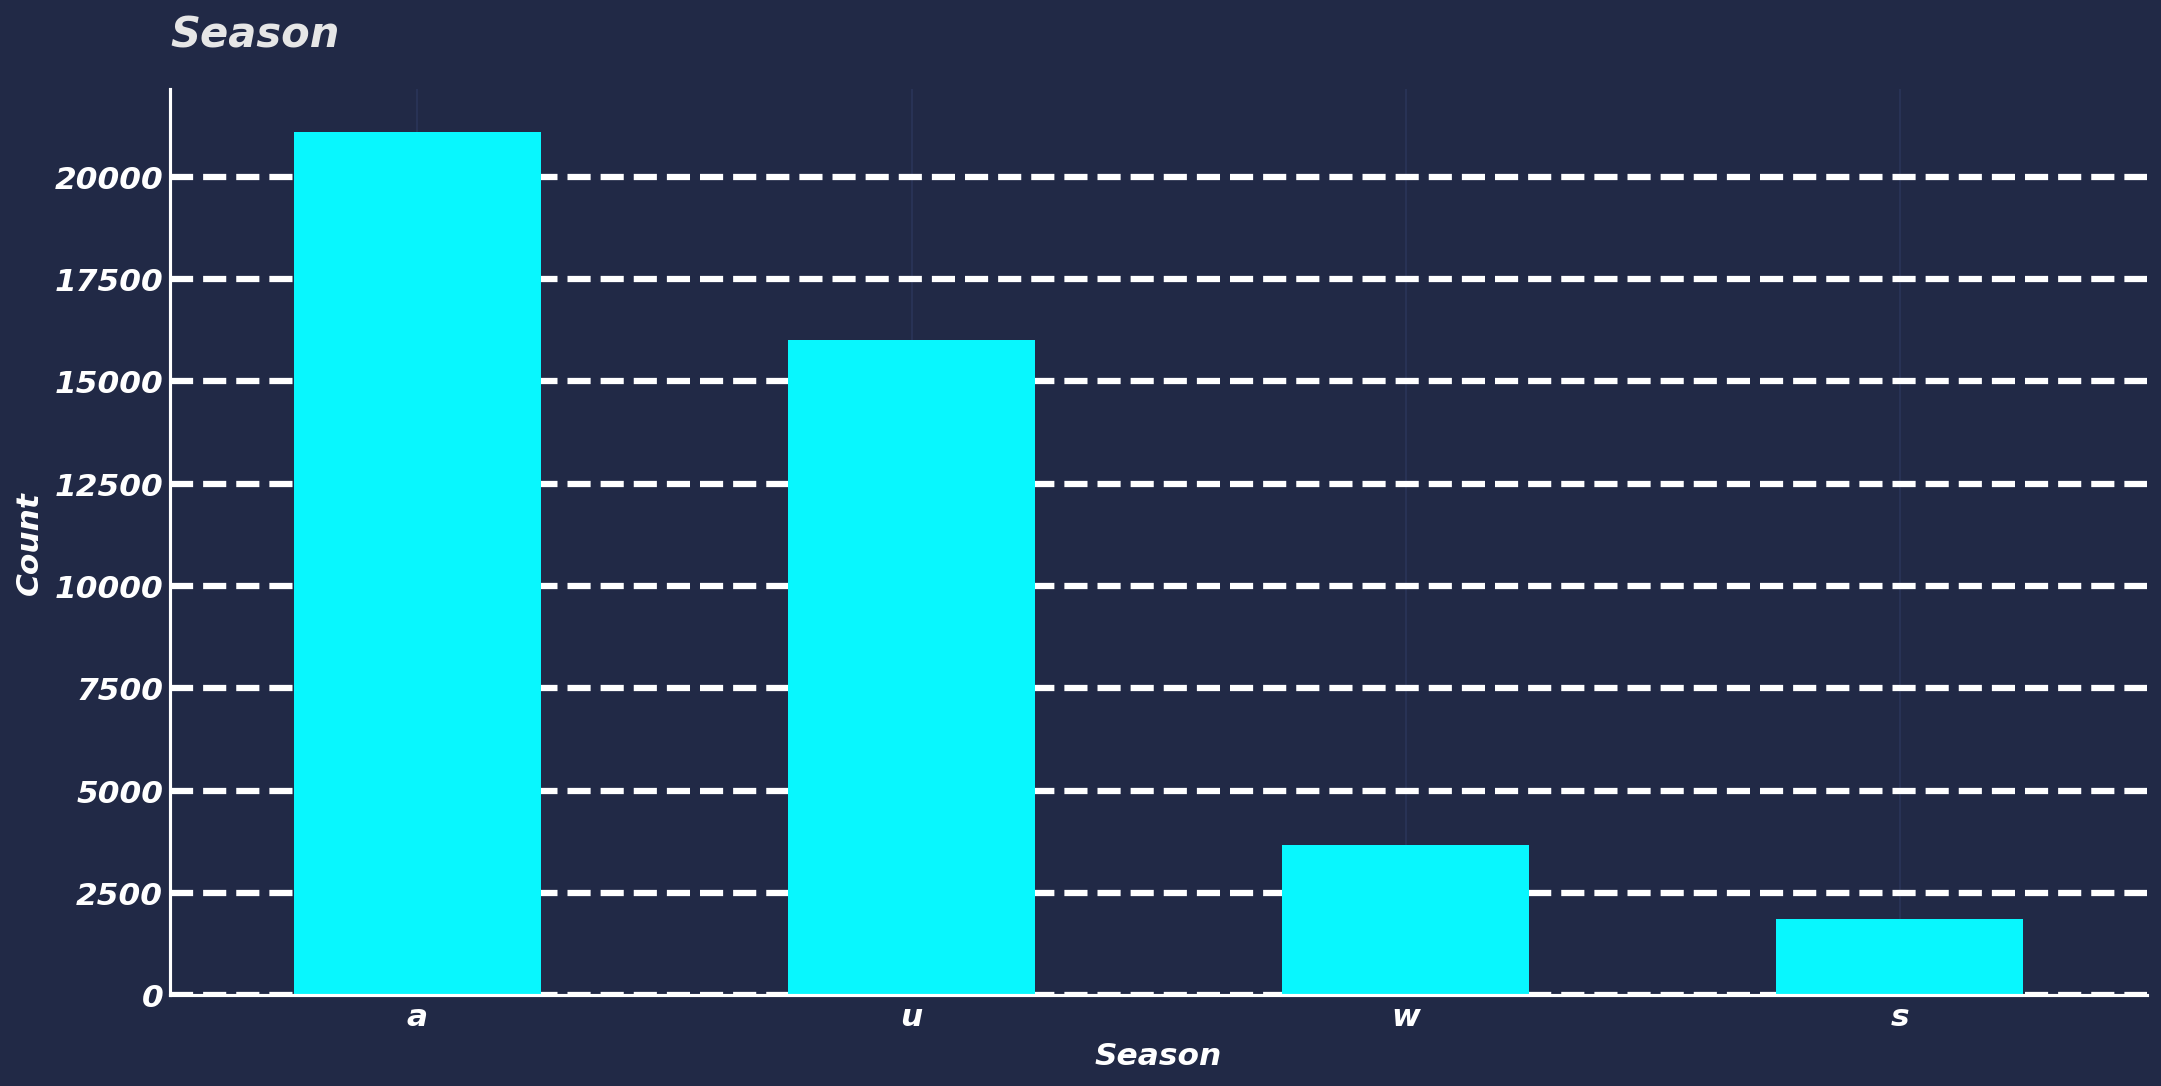

In [20]:
plt.figure(figsize=(17,8))
train.season.value_counts().plot(kind="bar")
plt.grid(axis="y",linestyle = "--",linewidth=3,color="white")
plt.title("Season")
plt.xlabel("Season")
plt.xticks(rotation=0) 
plt.ylabel("Count")


In [ ]:
# pisahkan fitur

In [14]:
cater = train.select_dtypes("object").drop("season",axis=1).columns
numer = train.select_dtypes("number").columns

In [13]:
print(f"fitur category punya: {len(cater)} column ")
print(f"fitur numeric punya: {len(numer)} column")

fitur category punya: 10 column 
fitur numeric punya: 3 column


In [25]:
## numeric features

In [26]:
train[numer].sample(10) 

,cap-diameter,stem-height,stem-width
10815,10.67,8.79,19.94
42471,1.39,3.82,1.40
30480,11.55,7.84,28.61
35831,3.05,10.07,6.59
31275,9.38,9.31,24.81
33011,9.17,8.05,22.79
26686,5.30,11.43,6.08
35951,1.57,5.59,2.67
28106,5.59,12.51,12.03
10132,10.30,5.75,17.73


In [16]:
train[numer].describe()

,cap-diameter,stem-height,stem-width
count,42657.000000,42657.000000,42657.000000
mean,6.718913,6.594405,12.159831
std,5.207056,3.358340,10.054032
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.230000
50%,5.850000,5.960000,10.160000
75%,8.550000,7.740000,16.550000
max,62.340000,33.920000,103.910000


In [35]:
# check 2 nilai Terbesar 

In [6]:
train[numer[0]].nlargest(5)

3929     62.34
11922    59.46
41343    58.89
5849     58.30
34205    58.21
Name: cap-diameter, dtype: float64

In [7]:
train[numer[1]].nlargest(5)

26902    33.92
1568     33.72
29215    33.25
28421    33.03
21835    32.85
Name: stem-height, dtype: float64

In [8]:
train[numer[2]].nlargest(5)

12622    103.91
42527    102.48
39853    101.69
2143      95.68
40757     95.55
Name: stem-width, dtype: float64

In [ ]:
# check distribution 

Text(0.5, 1, 'Numeric Feature Distribution')

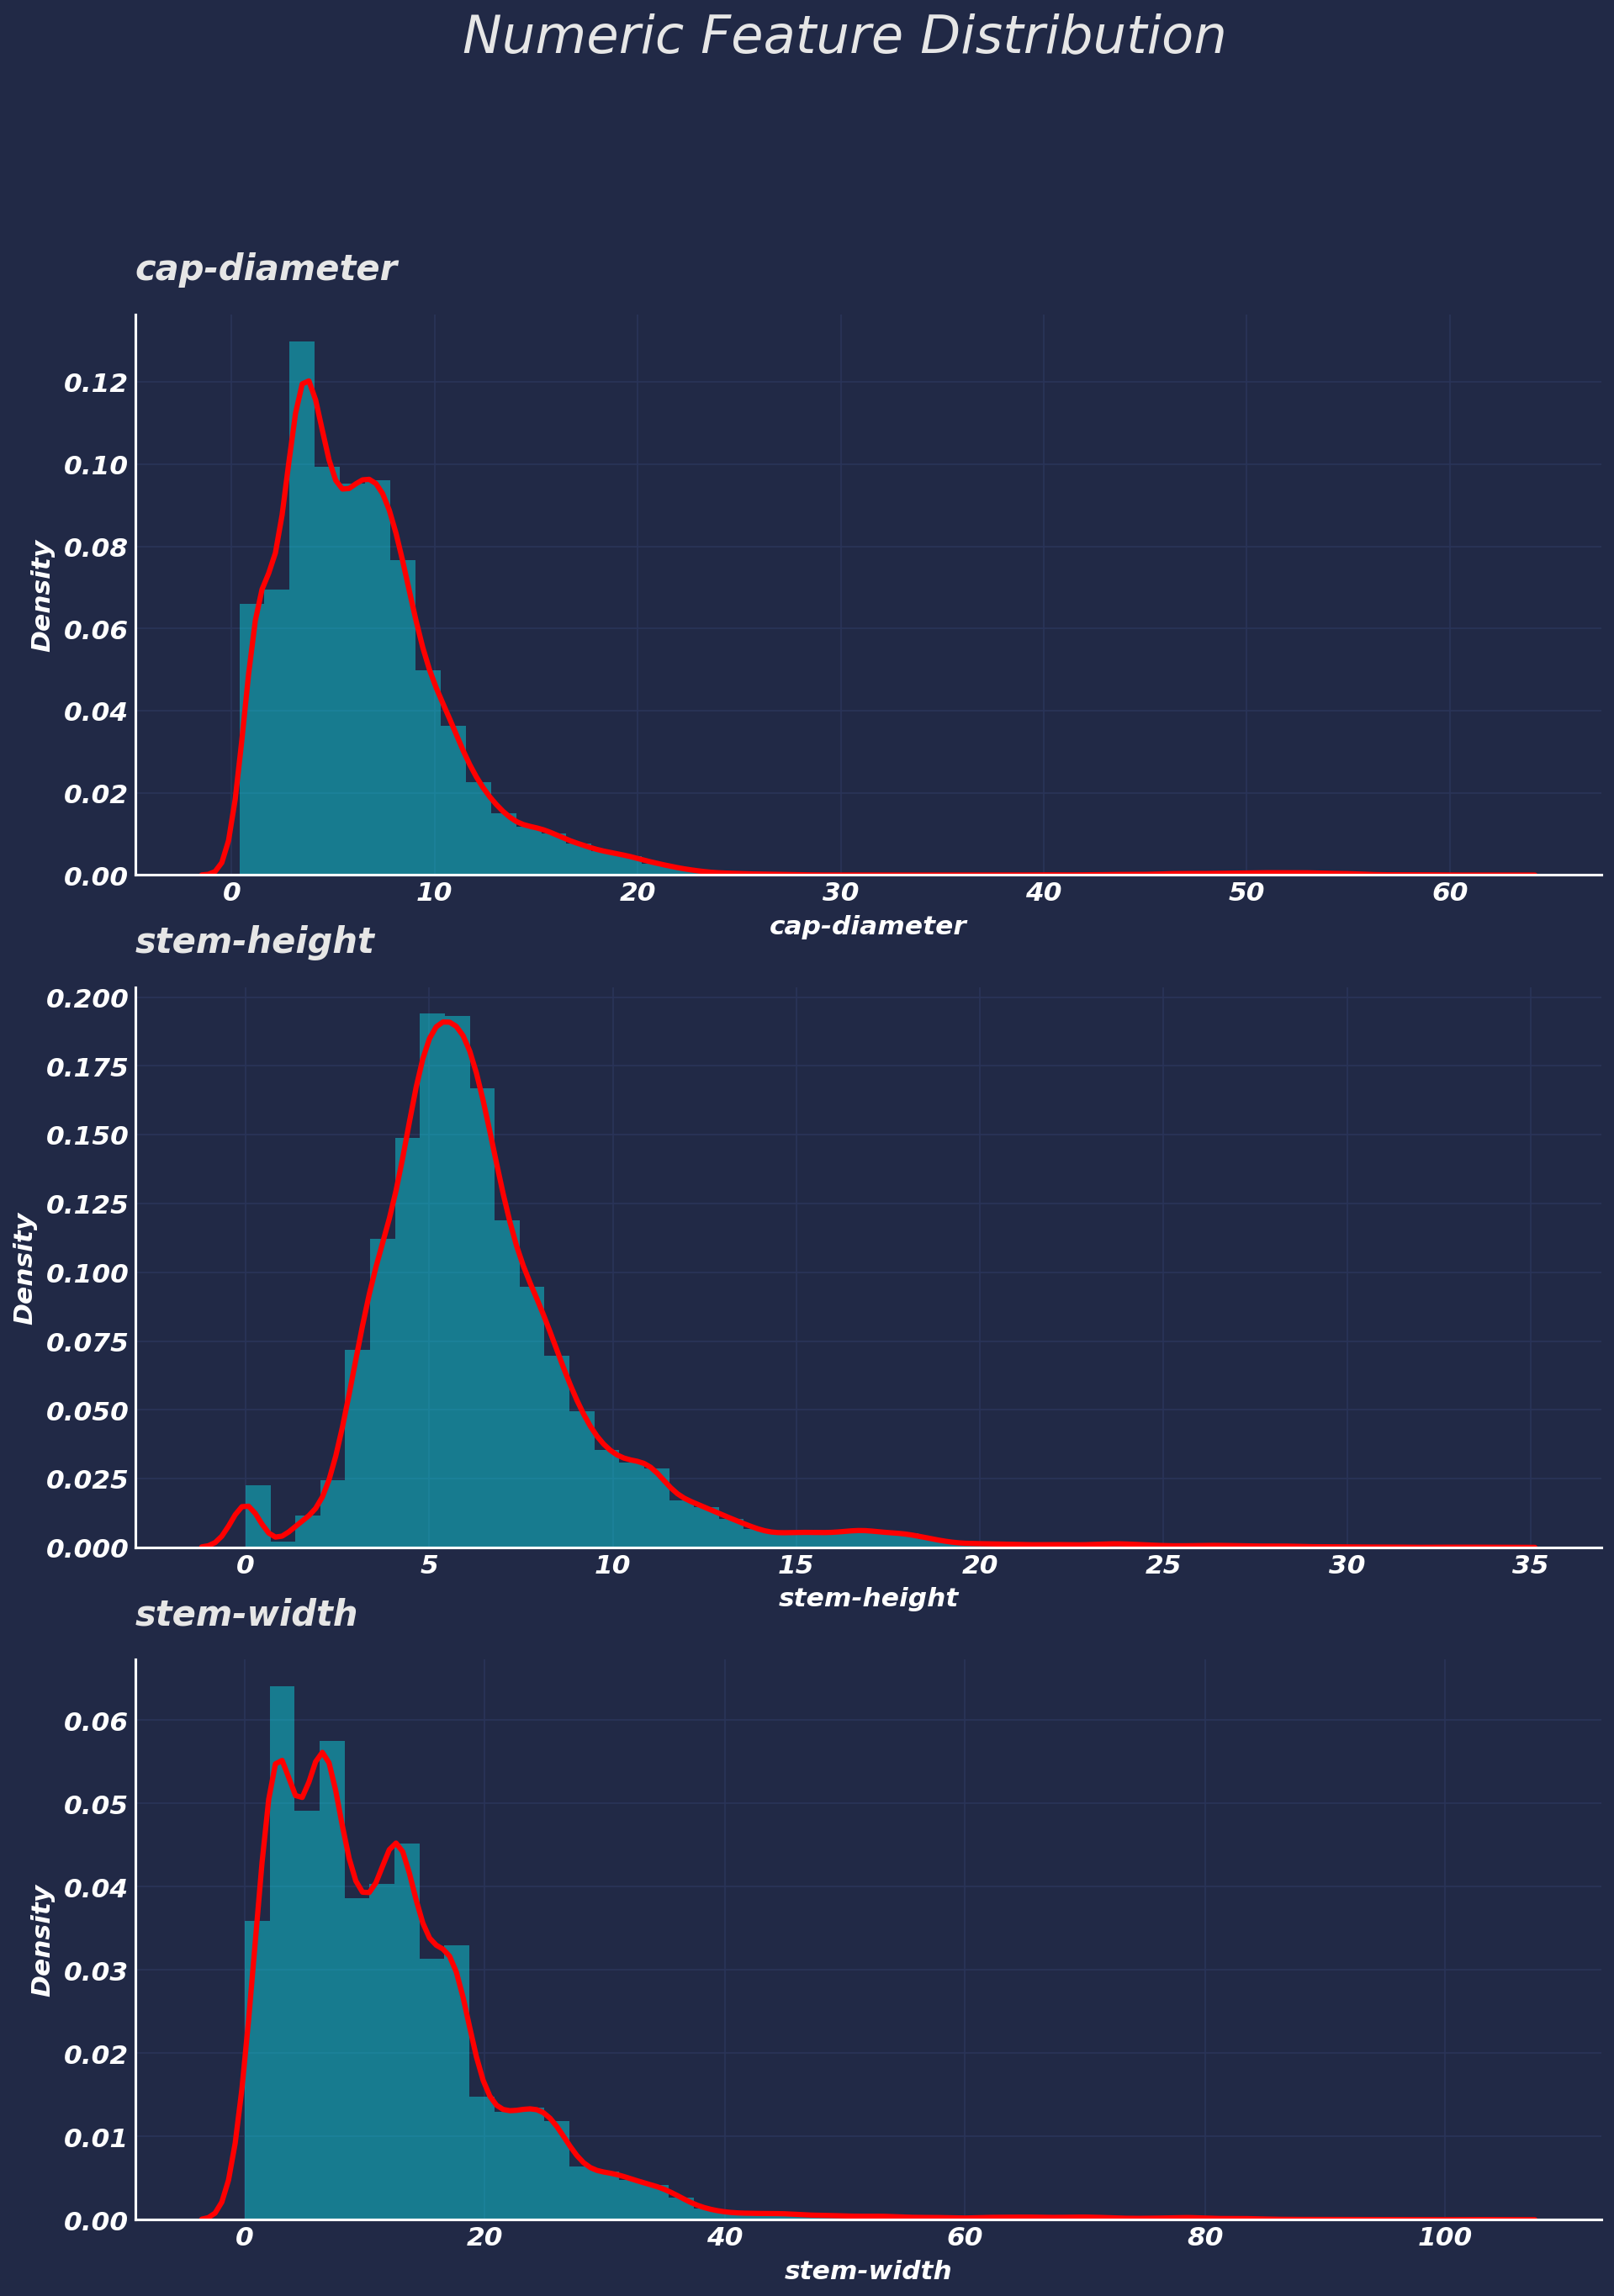

In [24]:
plt.figure(figsize=(15,20))
for i,j in enumerate(numer):
    plt.subplot(3, 1, i+1) 
    
    sns.distplot(train[j], kde_kws={"color": "red", "linewidth": 3}) 
    plt.title(j) 
plt.suptitle("Numeric Feature Distribution", size=30, y=1) 

In [ ]:
# check Skewnes & Kurtosis 

In [29]:
for i in numer:
    print(f"fitur {i}") 
    print(f"Skew: {np.round(train[i].skew(),2)}") 
    print(f"Kurt: {np.round(train[i].kurt(),2)}\n") 

fitur cap-diameter
Skew: 3.78
Kurt: 27.06

fitur stem-height
Skew: 2.04
Kurt: 7.68

fitur stem-width
Skew: 2.19
Kurt: 8.91



In [ ]:
# bandingkan dengan season targrt)

Text(0.5, 1, 'Numeric Feature Distribution vs Target')

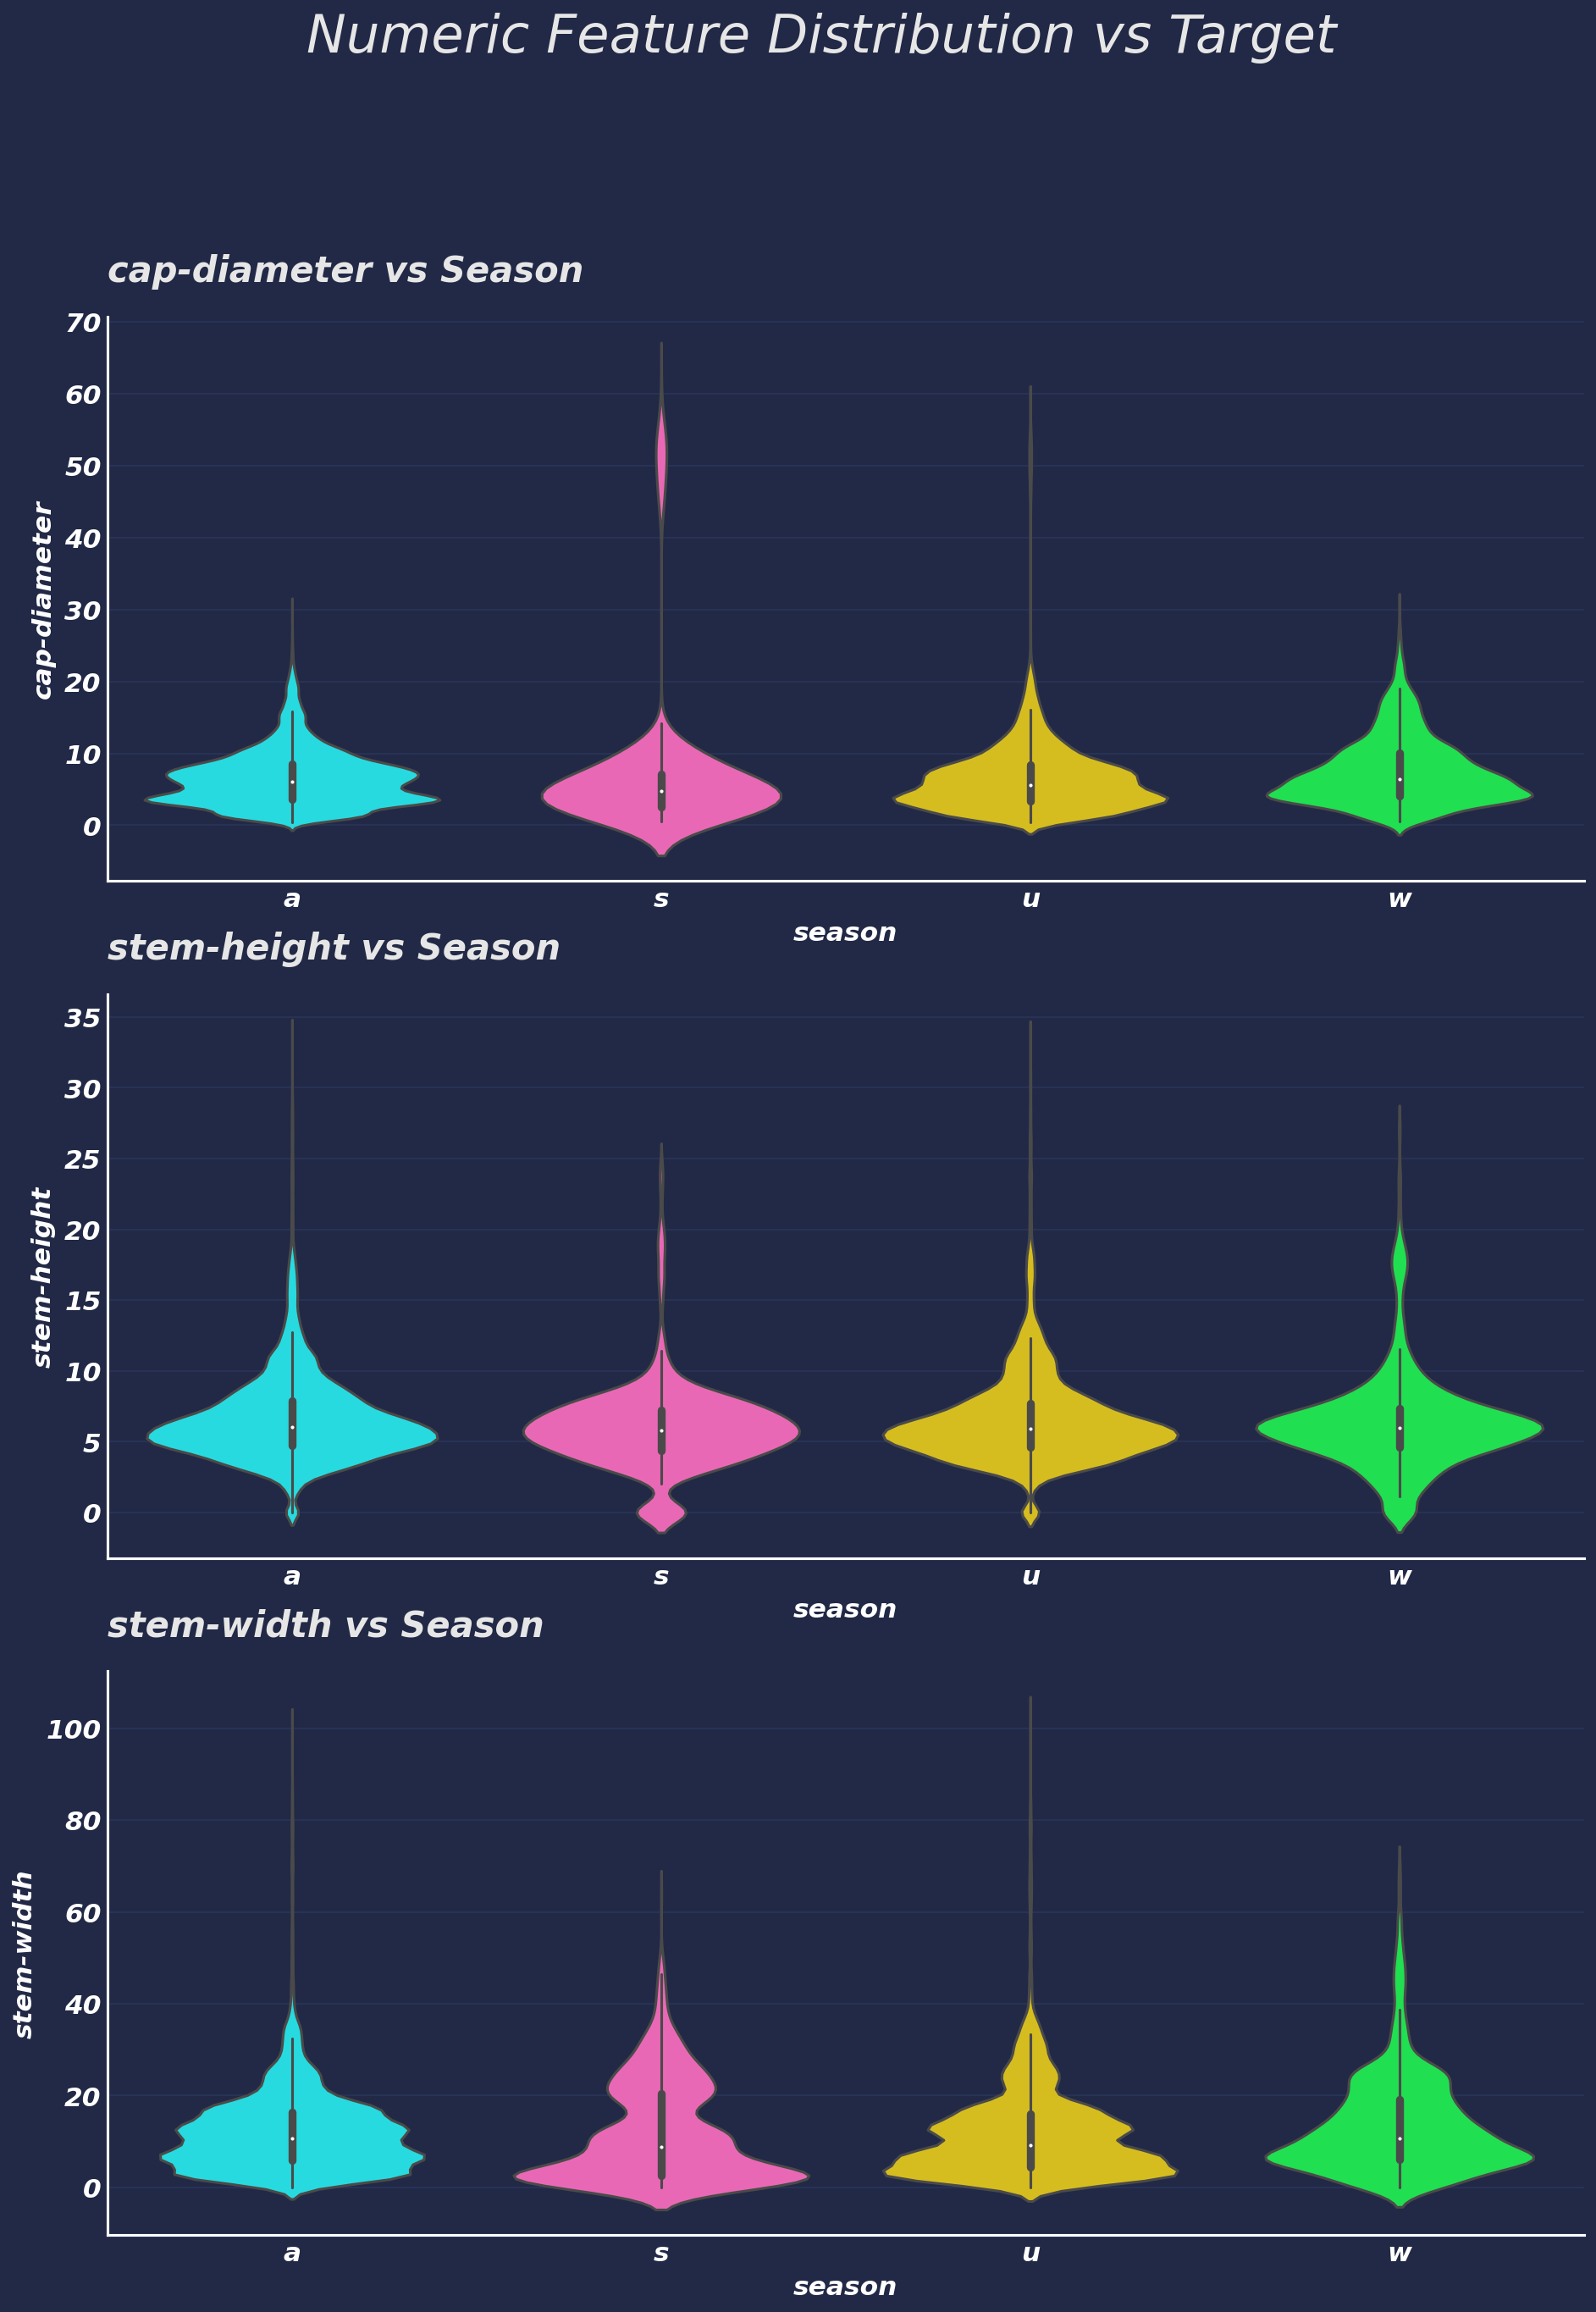

In [29]:
plt.figure(figsize=(15,20))
for i,j in enumerate(numer):
    plt.subplot(3, 1, i+1) 
    
    sns.violinplot(x = train.season, y= train[j]) 
    plt.title(j + " vs Season") 
plt.suptitle("Numeric Feature Distribution vs Target", size=30, y=1) 

In [ ]:
# check rata² fitur numeric berdasarkan target di tabel

In [41]:
# cap diameter
train.groupby("season")[numer[0]].mean().to_frame().style.bar("cap-diameter", color="red") 

,cap-diameter
season,
a,6.548748
s,7.345544
u,6.667562
w,7.598130


In [44]:
# stem height
train.groupby("season")[numer[1]].mean().to_frame().style.bar("stem-height", color="red") 

,stem-height
season,
a,6.677283
s,6.004163
u,6.601252
w,6.390625


In [43]:
# stem width
train.groupby("season")[numer[2]].mean().to_frame().style.bar("stem-width", color="red") 

,stem-width
season,
a,12.177740
s,11.937015
u,11.812276
w,13.684140


In [ ]:
## Category features

In [14]:
train[cater].sample(10)

,edible-poisonous,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat
35967,e,s,y,f,f,f,y,f,f,d
16162,e,b,w,f,NaN,g,w,f,f,d
22558,e,s,w,t,d,w,w,f,f,d
33439,p,x,n,f,e,w,w,t,p,d
26388,p,f,g,t,d,b,n,f,f,d
4594,p,b,y,f,NaN,n,n,f,f,m
5554,p,x,w,t,d,w,w,f,f,d
23683,p,x,p,f,x,w,w,f,f,d
26202,p,f,y,f,a,y,y,f,f,g
28246,p,s,u,f,a,w,y,f,f,d


In [15]:
train[cater].describe()

,edible-poisonous,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat
count,42748,42748,42748,42748,35808,42748,42748,42748,41029,42748
unique,2,7,12,2,7,12,13,2,8,8
top,p,x,n,f,a,w,w,f,f,d
freq,23707,18884,16940,35335,8874,12930,16014,32138,33864,30934


Text(0.5, 1.1, 'Distribution of Categorical Features')

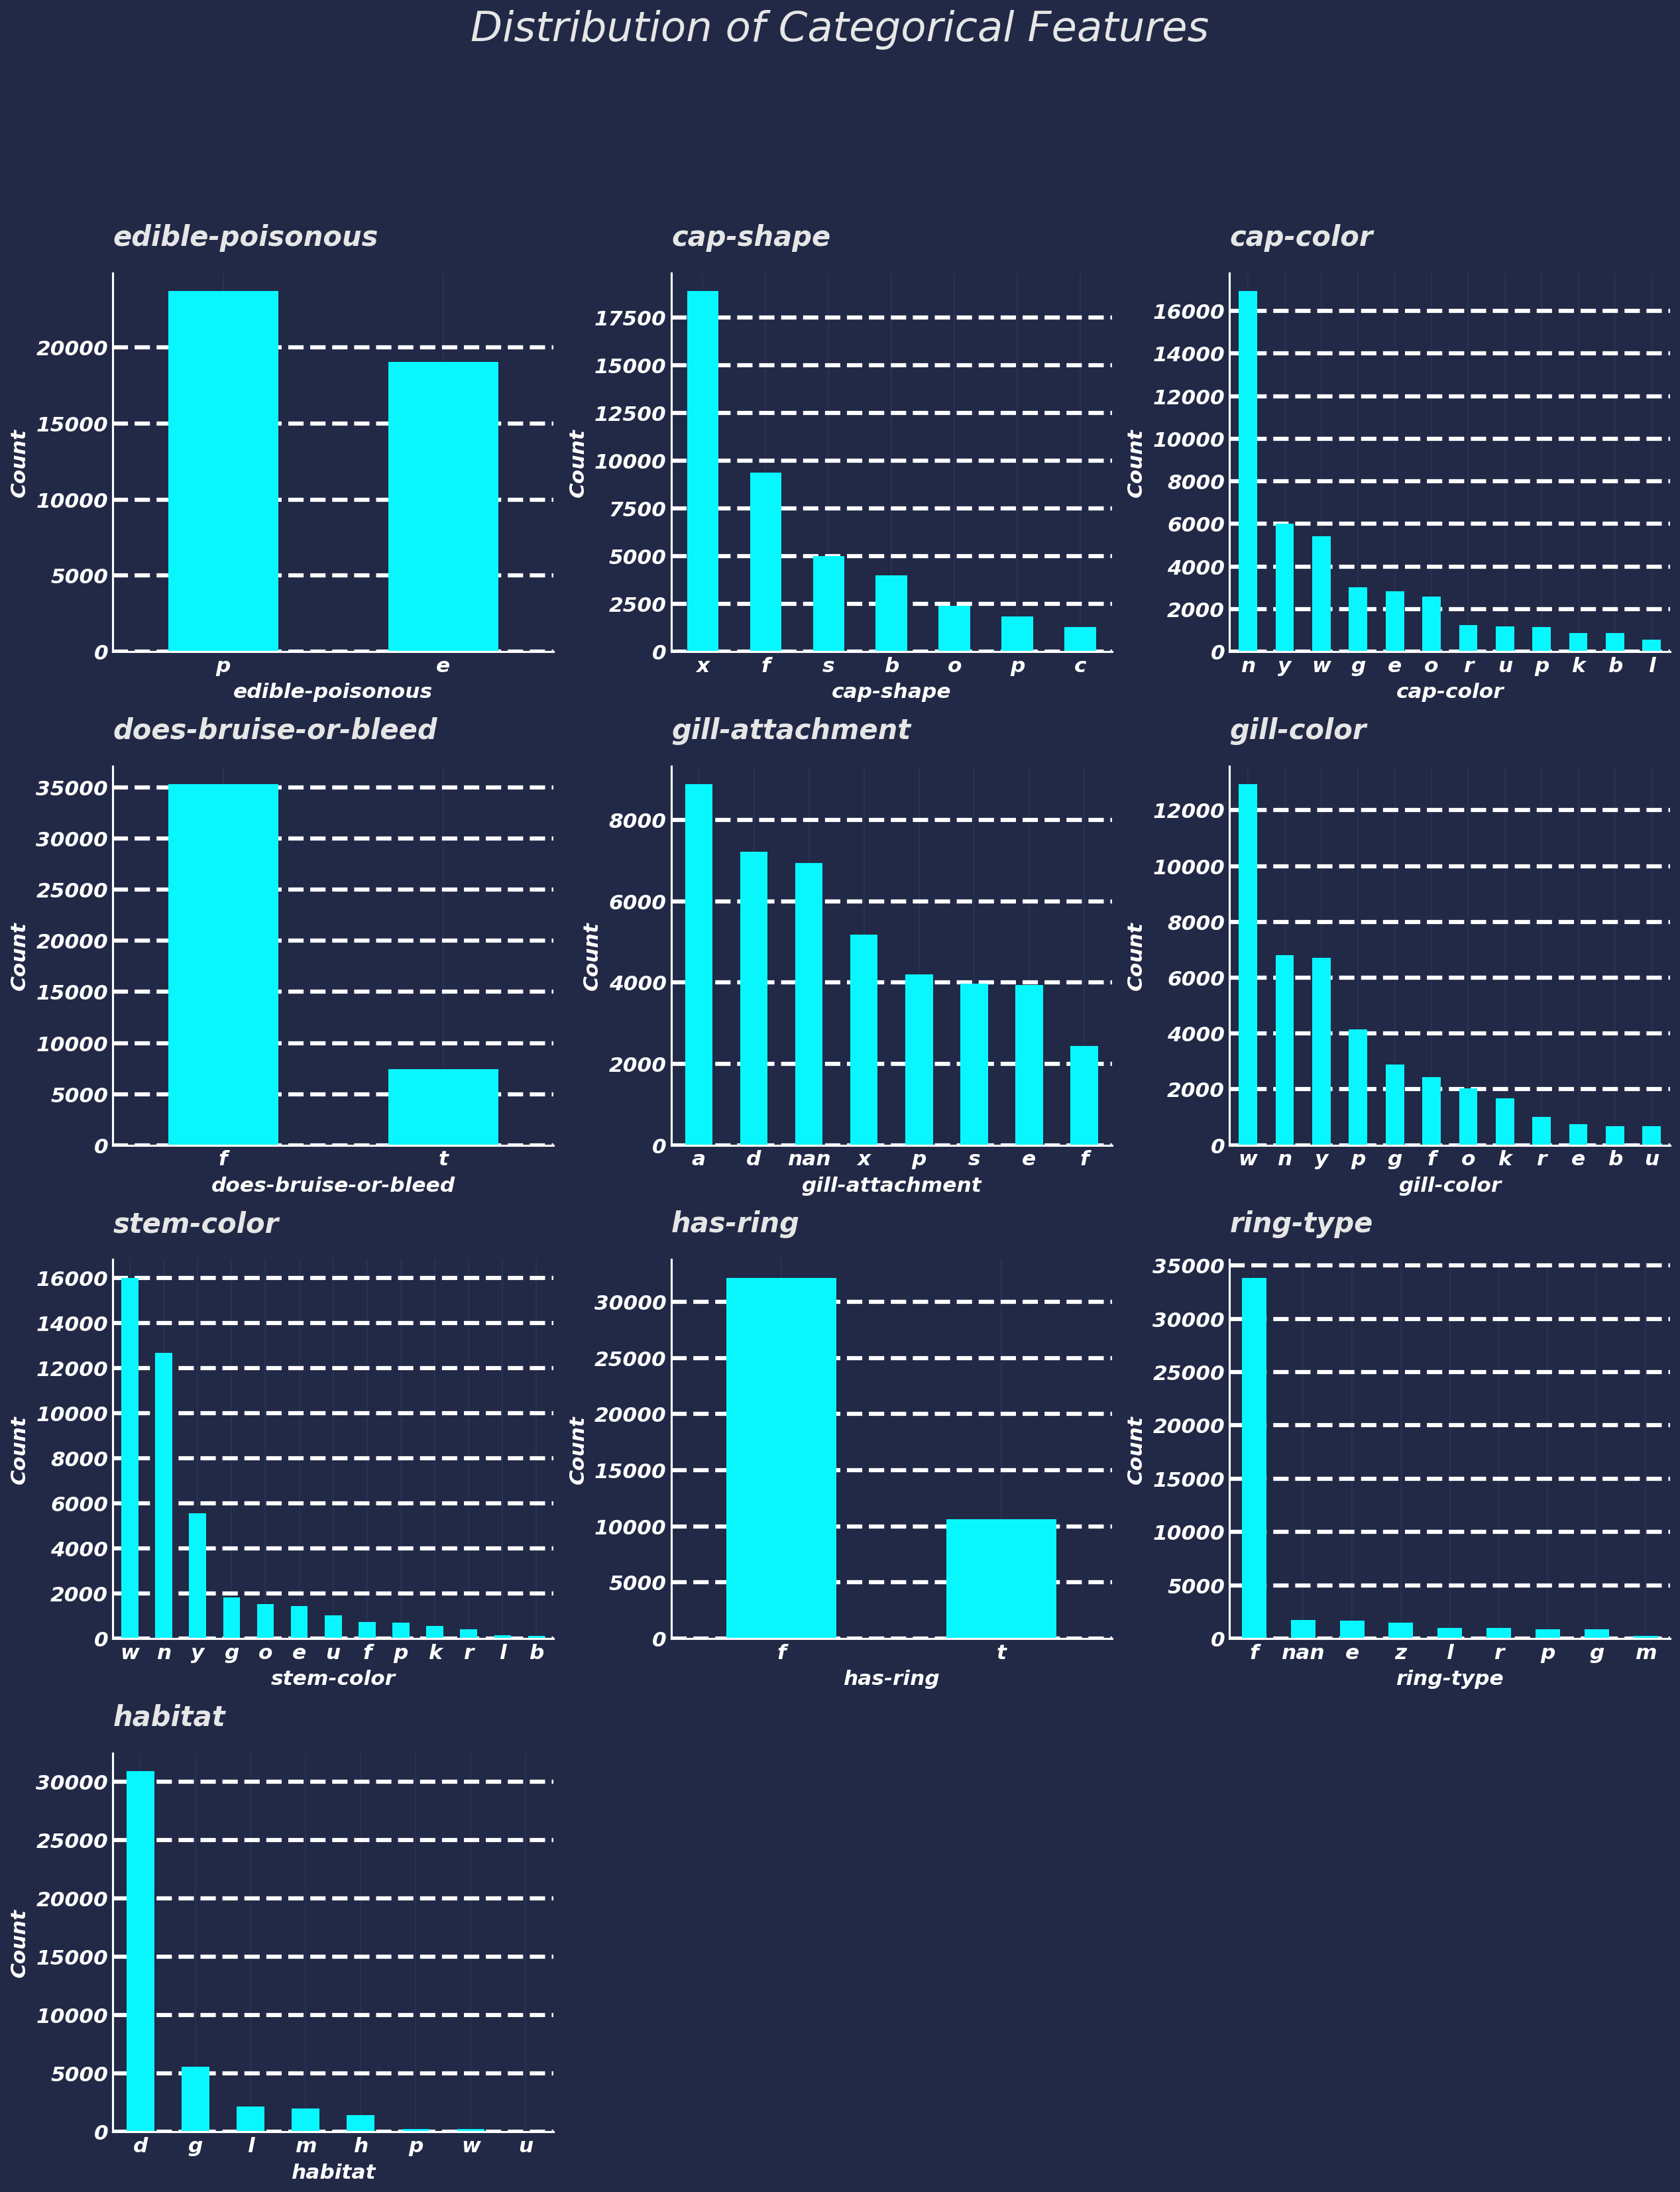

In [53]:
plt.figure(figsize=(17,20))

for i,j in enumerate(cater): 
    plt.subplot(4, 3, i+1) 
    
    train[j].value_counts(dropna=False).plot(kind="bar") 
    plt.xlabel(j)
    plt.xticks(rotation=0) 
    plt.ylabel("Count") 
    plt.grid(linewidth=3, linestyle = "--", color="white", axis="y") 
    plt.title(j)
plt.tight_layout()
plt.suptitle("Distribution of Categorical Features", size=30, y = 1.1) 

In [ ]:
# bandingkan dengan target di table 

In [42]:
# dalam persen%
pd.crosstab(train[cater[0]], train.season,normalize=True)#value_counts())

season,a,s,u,w
edible-poisonous,,,,
e,0.210396,0.025264,0.157458,0.052307
p,0.283265,0.018995,0.218115,0.034200


In [41]:
# dalam persen%
pd.crosstab(train[cater[1]], train.season,normalize=True)#value_counts())

season,a,s,u,w
cap-shape,,,,
b,0.040470,0.008538,0.038341,0.005895
c,0.012960,0.003696,0.013123,0.000000
f,0.112777,0.004749,0.076378,0.025218
o,0.016586,0.010924,0.020726,0.007813
p,0.020095,0.005568,0.014878,0.002573
s,0.060681,0.000000,0.048891,0.007369
x,0.230093,0.010784,0.163236,0.037639


In [40]:
# dalam persen%
pd.crosstab(train[cater[2]], train.season,normalize=True)#value_counts())

season,a,s,u,w
cap-color,,,,
b,0.013077,0.000000,0.002714,0.004515
e,0.038318,0.002293,0.021077,0.004632
g,0.030668,0.007205,0.022387,0.010831
k,0.009217,0.000000,0.009778,0.001567
l,0.006433,0.000000,0.005778,0.001123
n,0.194933,0.018995,0.150440,0.031908
o,0.031791,0.001965,0.018223,0.008562
p,0.013498,0.000444,0.009638,0.003673
r,0.014223,0.000211,0.012983,0.001614


In [39]:
# dalam persen%
pd.crosstab(train[cater[3]], train.season,normalize=True)#value_counts())

season,a,s,u,w
does-bruise-or-bleed,,,,
f,0.401025,0.042528,0.298657,0.084378
t,0.092636,0.001731,0.076916,0.002129


In [38]:
# dalam persen%
pd.crosstab(train[cater[4]], train.season,normalize=True)#value_counts())

season,a,s,u,w
gill-attachment,,,,
a,0.118437,0.009914,0.096096,0.023375
d,0.104027,0.000000,0.075123,0.022537
e,0.052363,0.003435,0.047727,0.006479
f,0.024966,0.013963,0.022760,0.006256
p,0.055295,0.002849,0.055407,0.003882
s,0.063282,0.003770,0.031334,0.012316
x,0.075179,0.005893,0.056244,0.007093


In [37]:
# dalam persen%
pd.crosstab(train[cater[5]], train.season,normalize=True)#value_counts())

season,a,s,u,w
gill-color,,,,
b,0.011439,0.000000,0.002199,0.002456
e,0.012024,0.000000,0.004866,0.000889
f,0.020913,0.011696,0.019065,0.005240
g,0.030996,0.004983,0.025241,0.006339
k,0.016469,0.003275,0.014246,0.004983
n,0.075302,0.009100,0.060517,0.014223
o,0.024001,0.000000,0.016141,0.007579
p,0.049757,0.002222,0.038973,0.006082
r,0.011463,0.001193,0.010269,0.000515


In [49]:
# dalam persen%
pd.crosstab(train[cater[6]], train.season,normalize=True)#value_counts())

season,a,s,u,w
stem-color,,,,
b,0.001521,0.000000,0.000000,0.001170
e,0.022060,0.000000,0.010644,0.001029
f,0.005006,0.002877,0.006152,0.003275
g,0.019954,0.000842,0.019206,0.002293
k,0.003766,0.002480,0.005778,0.001310
l,0.001754,0.000000,0.001825,0.000000
n,0.137457,0.019533,0.112520,0.026995
o,0.020001,0.000983,0.009147,0.005731
p,0.007790,0.000000,0.005310,0.003556


In [48]:
# dalam persen%
pd.crosstab(train[cater[7]], train.season,normalize=True)#value_counts())

season,a,s,u,w
has-ring,,,,
f,0.379176,0.033288,0.276574,0.062763
t,0.114485,0.010971,0.098999,0.023744


In [47]:
# dalam persen%
pd.crosstab(train[cater[8]], train.season,normalize=True)#value_counts())

season,a,s,u,w
ring-type,,,,
e,0.018280,0.003217,0.014965,0.005045
f,0.414292,0.036170,0.307758,0.067148
g,0.009505,0.000000,0.010188,0.001097
l,0.012357,0.000000,0.010017,0.002096
m,0.002949,0.000000,0.002974,0.000000
p,0.011845,0.000000,0.008457,0.001072
r,0.009164,0.001267,0.010359,0.003388
z,0.017622,0.003388,0.009189,0.006191


In [46]:
# dalam persen%
pd.crosstab(train[cater[9]], train.season,normalize=True)#value_counts())

season,a,s,u,w
habitat,,,,
d,0.361537,0.031393,0.264246,0.066459
g,0.059652,0.005287,0.057827,0.008515
h,0.018597,0.000608,0.013966,0.000000
l,0.025896,0.002503,0.014854,0.007860
m,0.021568,0.004000,0.018808,0.003135
p,0.003345,0.000000,0.002456,0.000000
u,0.000444,0.000468,0.000374,0.000538
w,0.002620,0.000000,0.003041,0.000000


In [ ]:
# isi dengan nilai hilang dengan f/none 

In [15]:
for i in [train,test]:
    i["gill-attachment"] = i["gill-attachment"].fillna("f") 
    i["ring-type"] = i["ring-type"].fillna("f") 

In [58]:
train["ring-type"].value_counts(dropna=False) 
      

f    35583
e     1703
z     1493
l     1004
r      992
p      877
g      853
m      243
Name: ring-type, dtype: int64

In [ ]:
# buat fitur baru 

In [16]:
# punya == t, tidak == f 
for i in [train, test]: 
    i["has-gill-color"] = i["gill-color"].apply(lambda x: "f" if x == "f" else "t")
    i["has-gill-attachment"] = i["gill-attachment"].apply(lambda x: "f" if x == "f" else "t")
    i["has-stem-color"] = i["stem-color"].apply(lambda x: "f" if x == "f" else "t")
    

In [ ]:
# multivariate analysis

In [17]:
train.sample(10)

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,has-gill-color,has-gill-attachment,has-stem-color
13593,p,7.16,f,y,f,x,n,6.51,9.97,w,f,f,d,a,t,t,t
1240,e,16.24,p,w,f,f,w,22.60,18.49,n,t,m,m,a,t,f,t
37768,p,0.83,x,w,f,a,w,2.85,1.44,e,f,f,l,a,t,t,t
26920,p,3.18,x,n,f,x,p,8.76,4.09,p,f,f,l,a,t,t,t
14743,e,18.75,p,n,f,p,n,15.14,36.18,w,f,f,d,u,t,t,t
37414,p,3.75,f,n,f,x,y,4.90,2.93,n,f,f,l,u,t,t,t
20520,p,9.81,x,n,f,s,y,7.81,18.10,n,f,f,d,a,t,t,t
20139,p,2.39,f,w,f,a,n,4.27,3.50,u,f,f,d,u,t,t,t
39637,p,3.81,b,l,f,s,g,6.75,7.71,n,t,e,g,u,t,t,t
4628,e,7.08,f,o,f,s,n,8.13,12.64,n,f,f,d,a,t,t,t


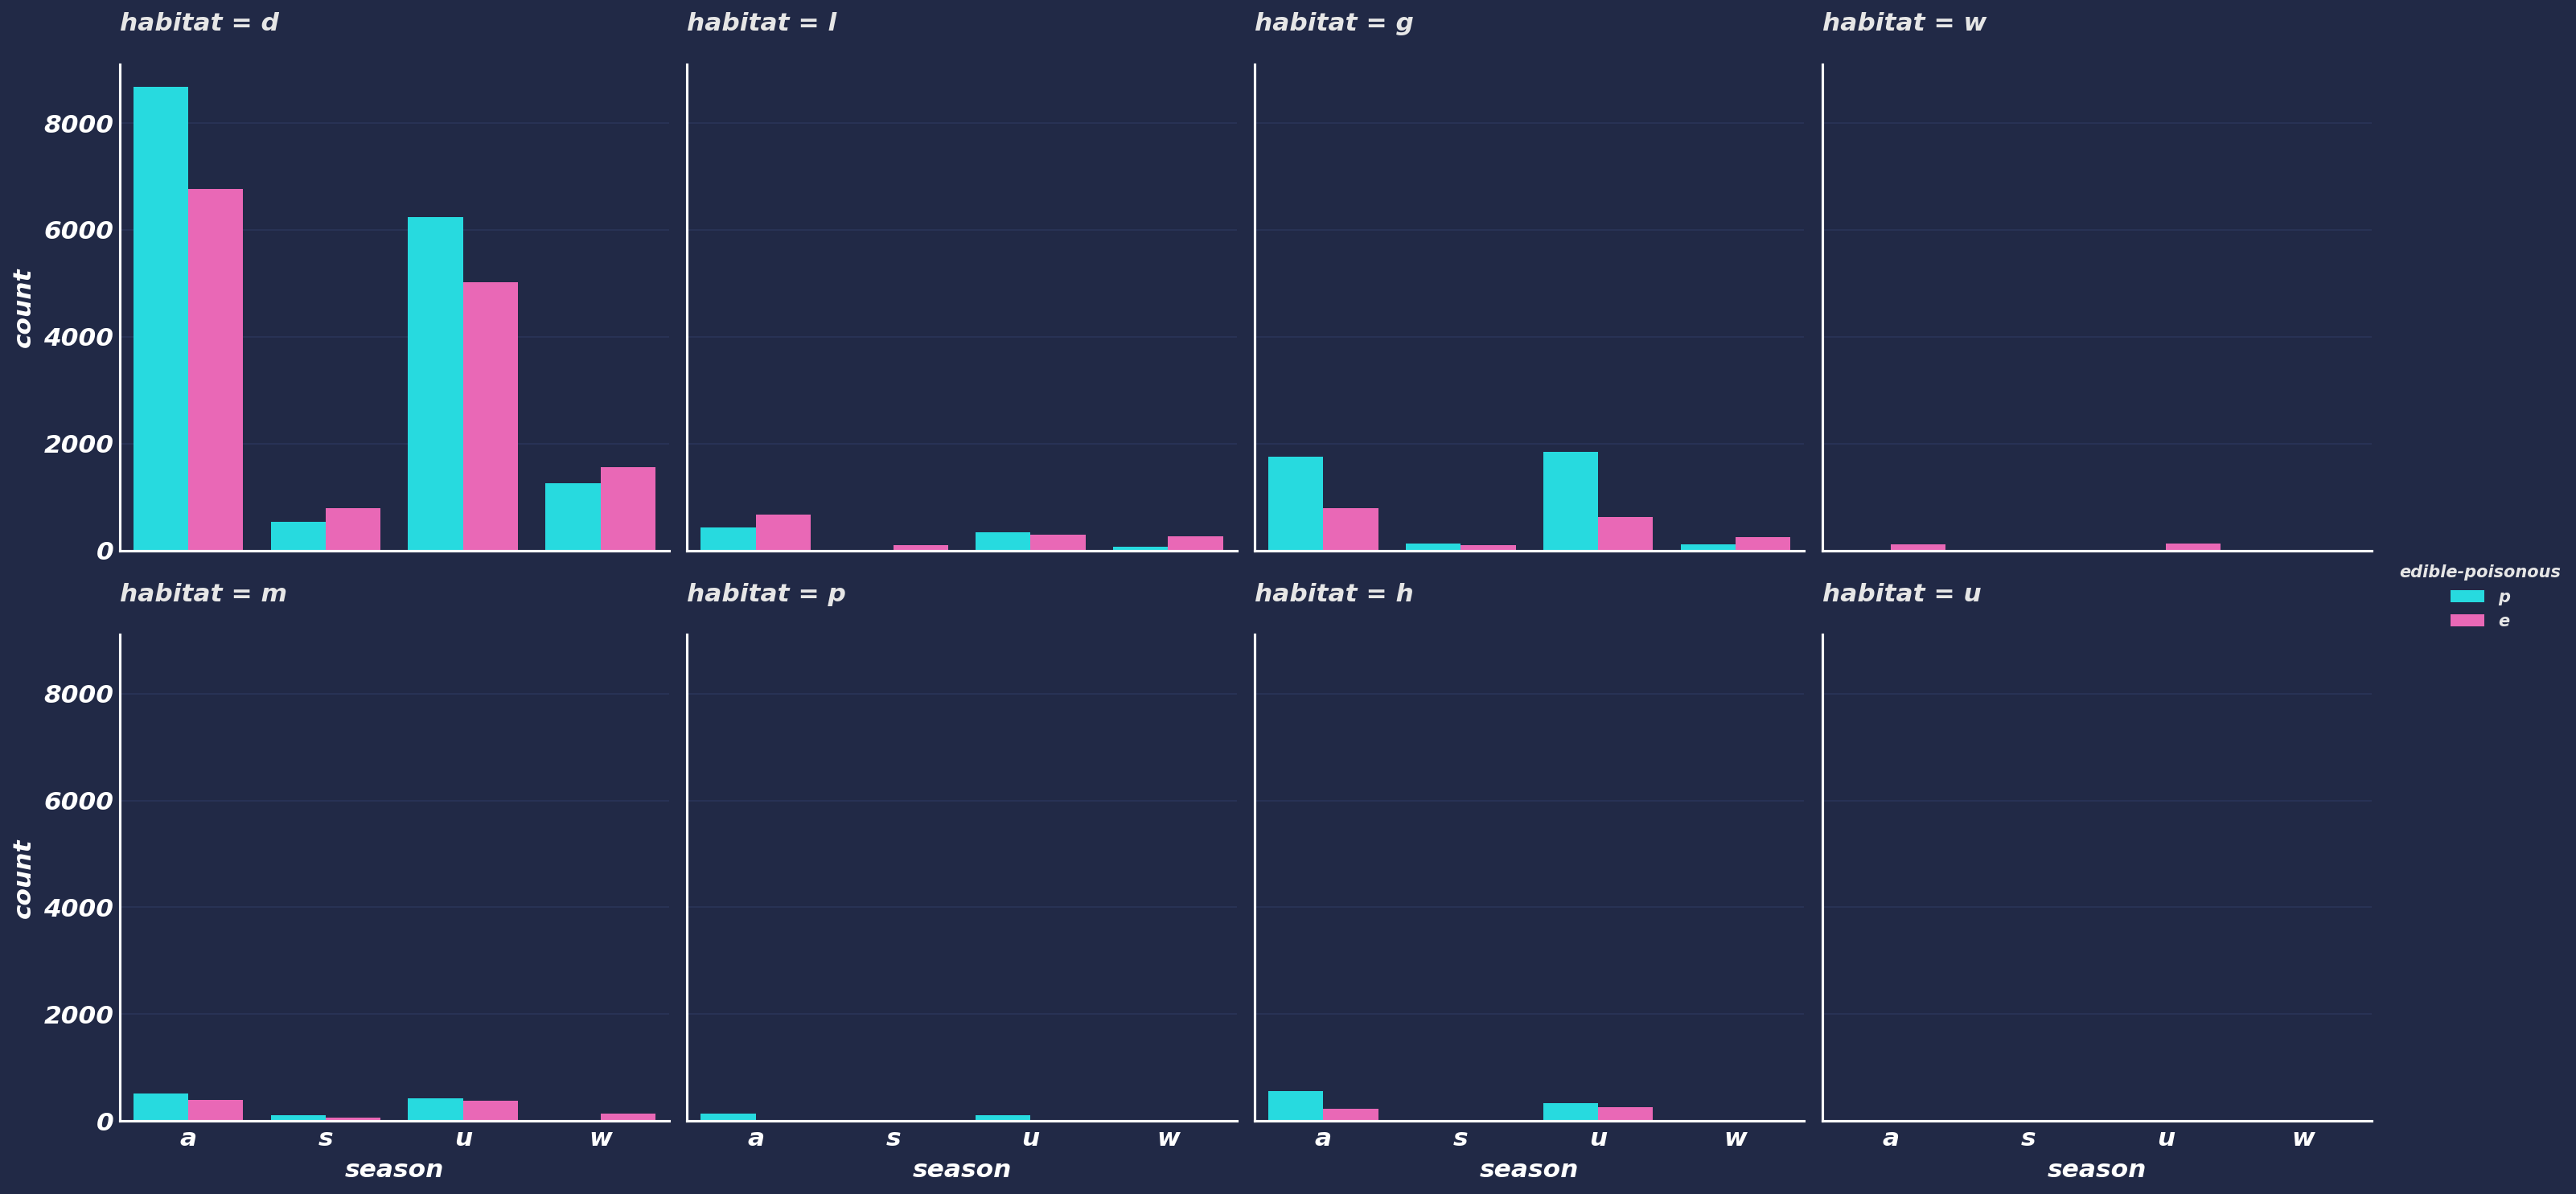

In [32]:
# liat penyebab di antara fitur ini 
sns.catplot(x = "season", hue ="edible-poisonous", col = "habitat",col_wrap = 4,data = train, kind="count")


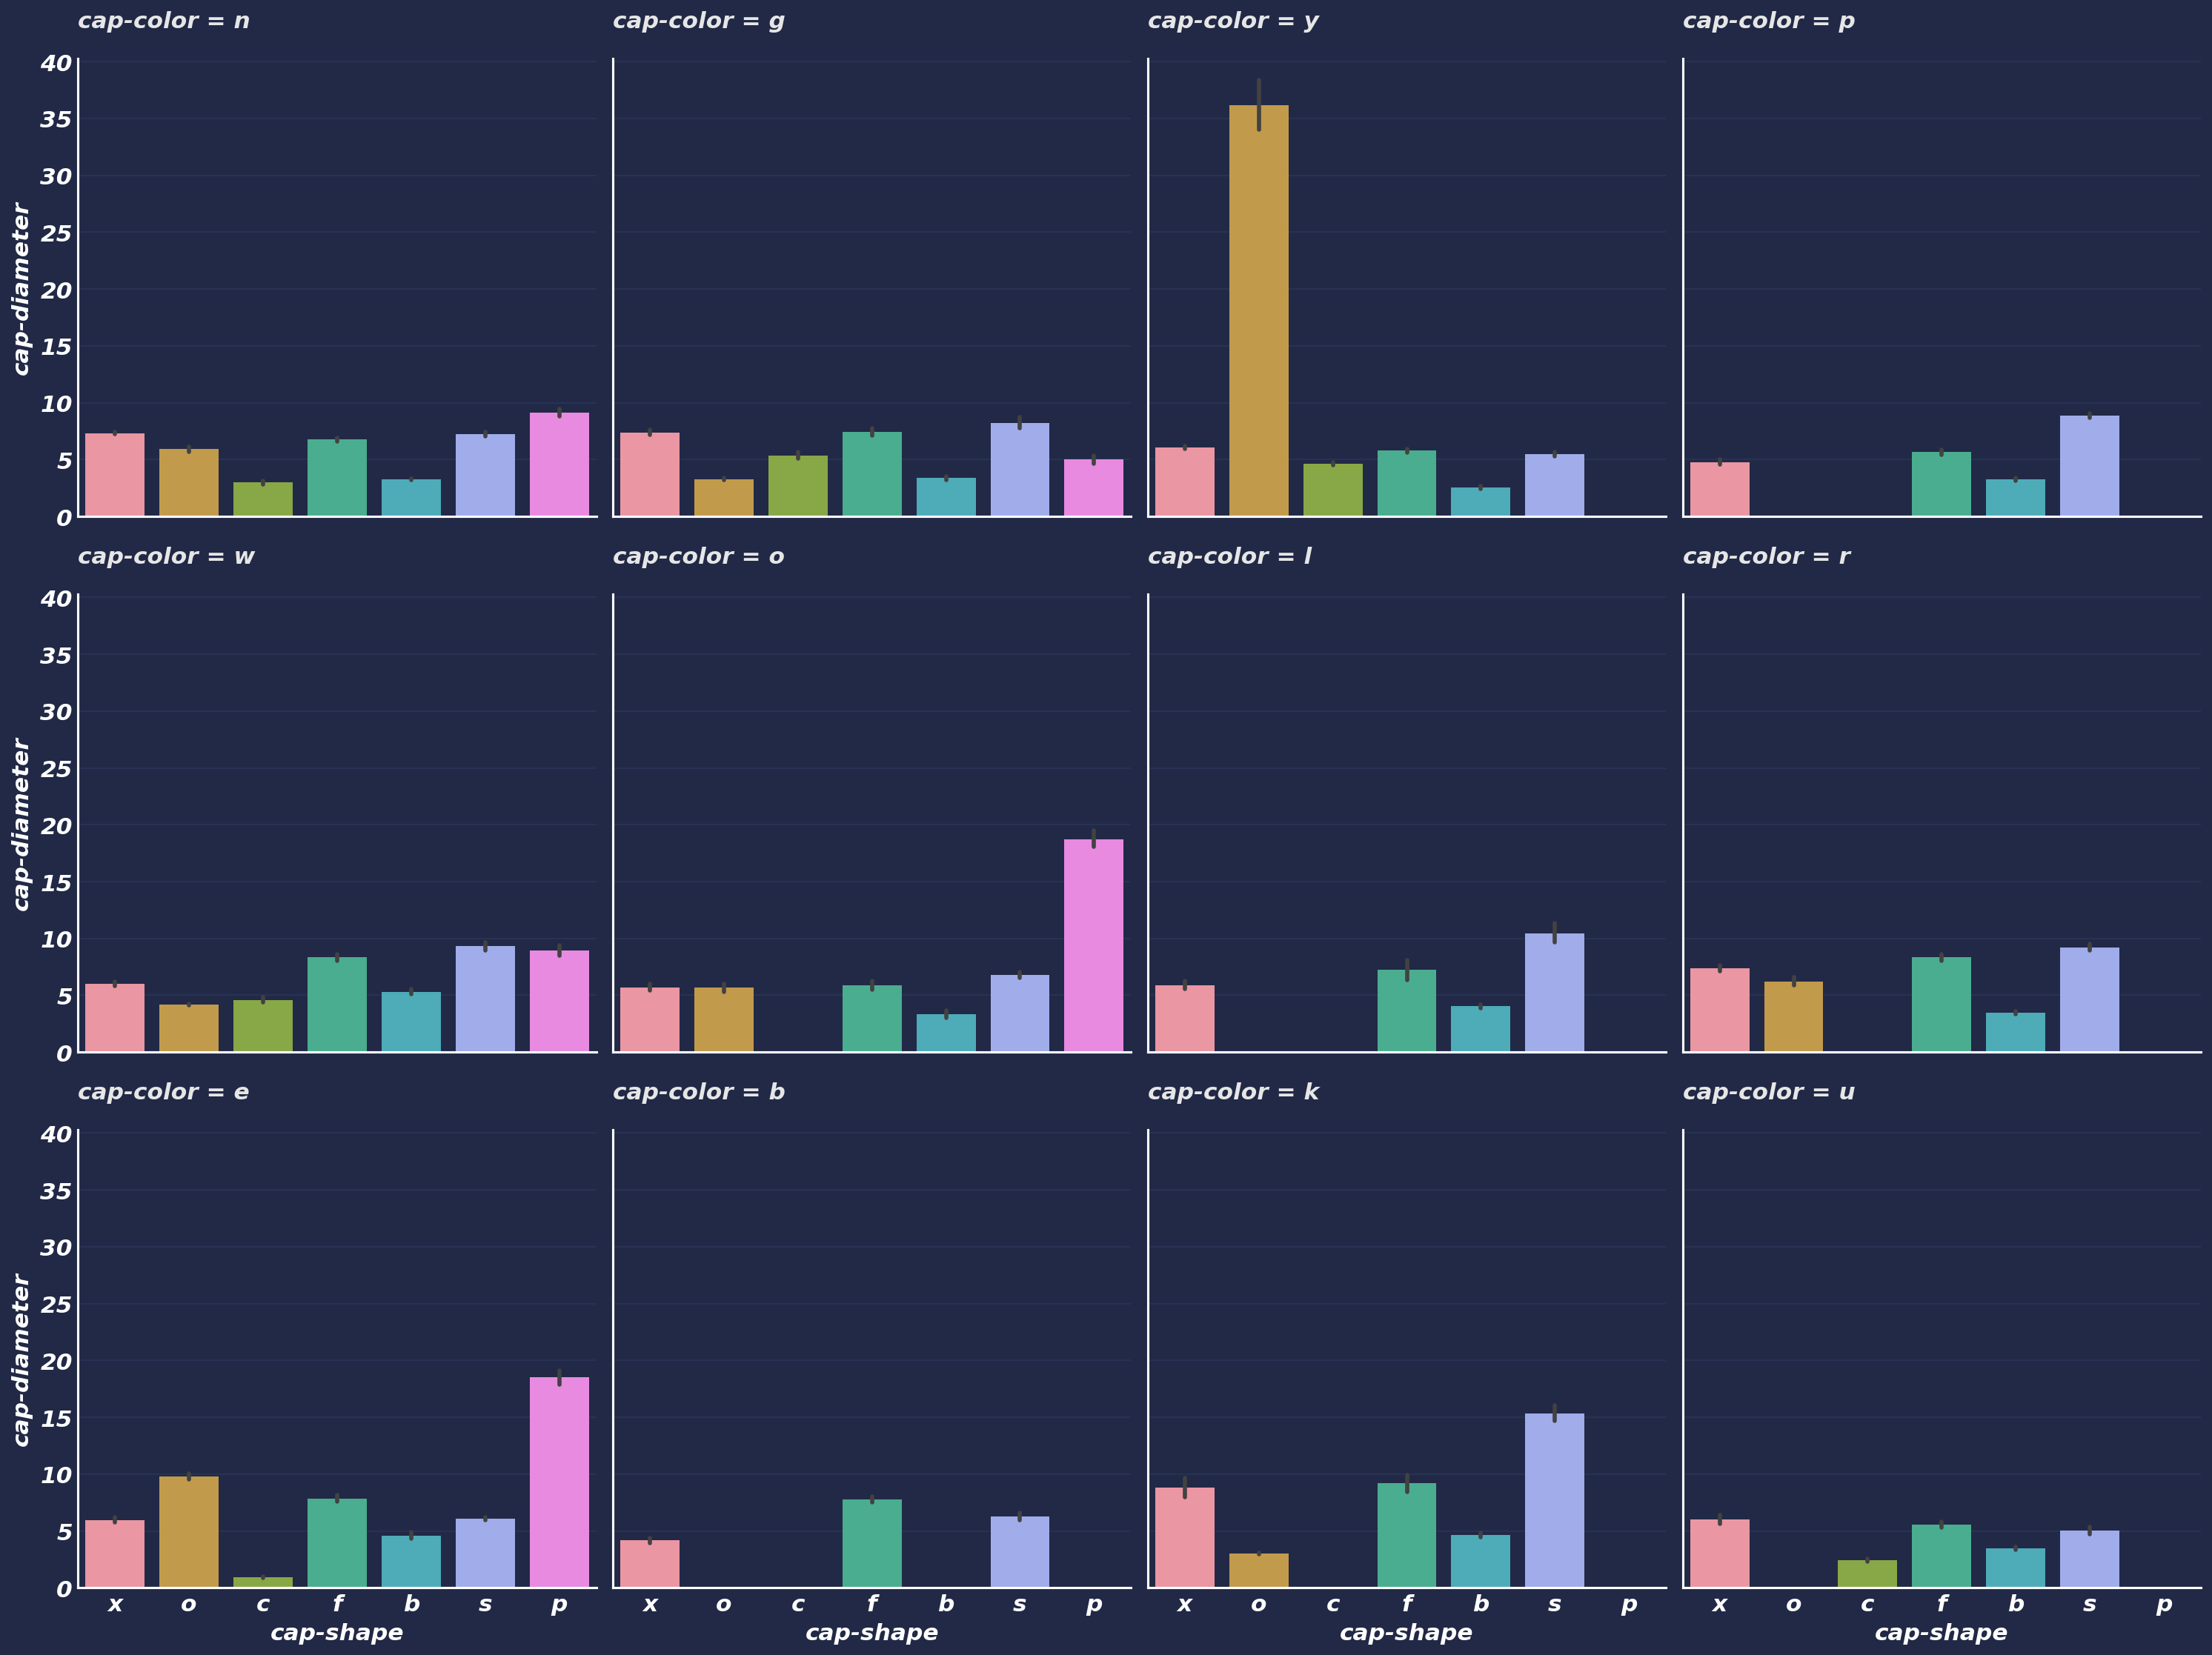

In [31]:
# liat penyebab di antara fitur ini 
sns.catplot(x = "cap-shape", y = "cap-diameter", col = "cap-color", col_wrap = 4, data = train, kind="bar")


Text(0.0, 1.0, 'Correlation of stem width and stem height')

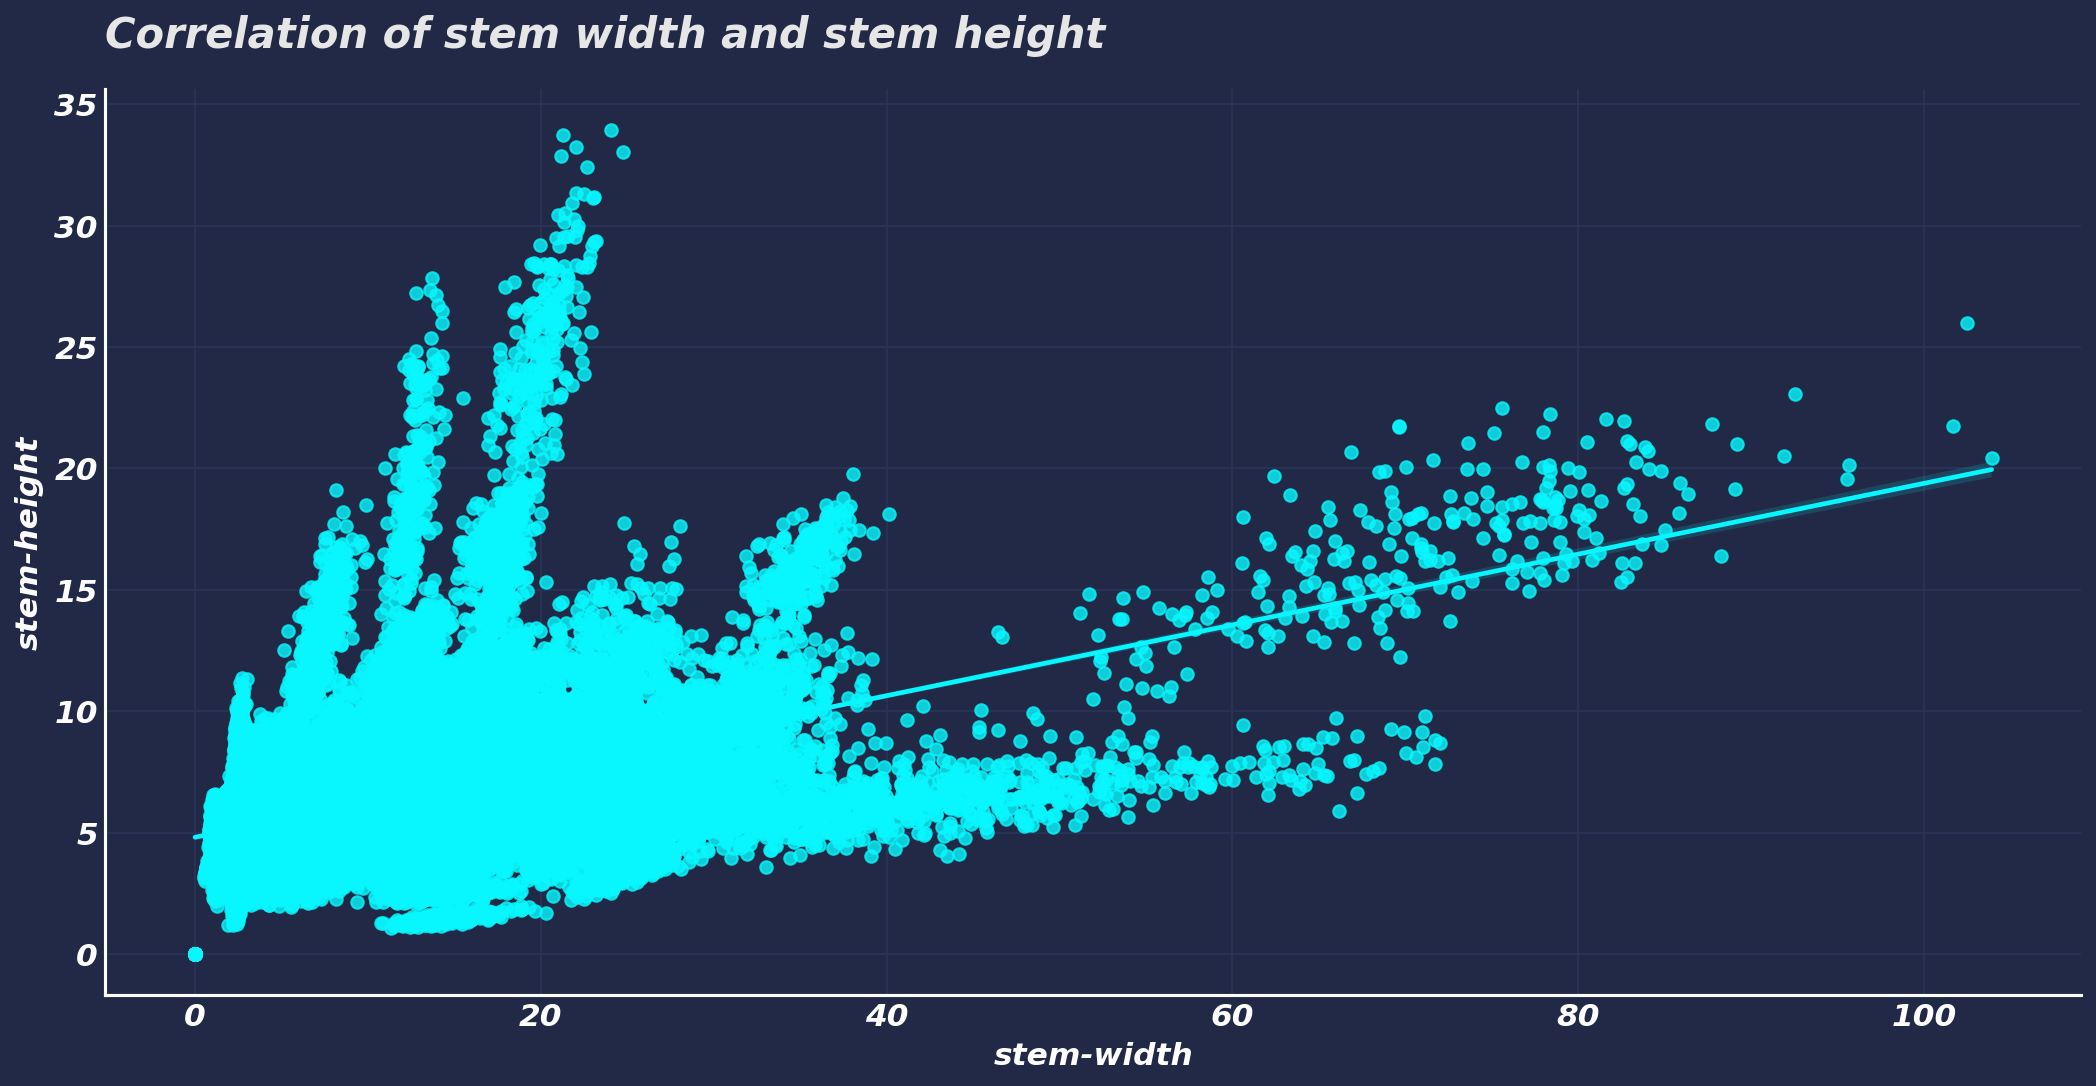

In [69]:
plt.figure(figsize=(17,8))
sns.regplot(x = "stem-width", y = "stem-height", data=train) 
plt.title("Correlation of stem width and stem height") 

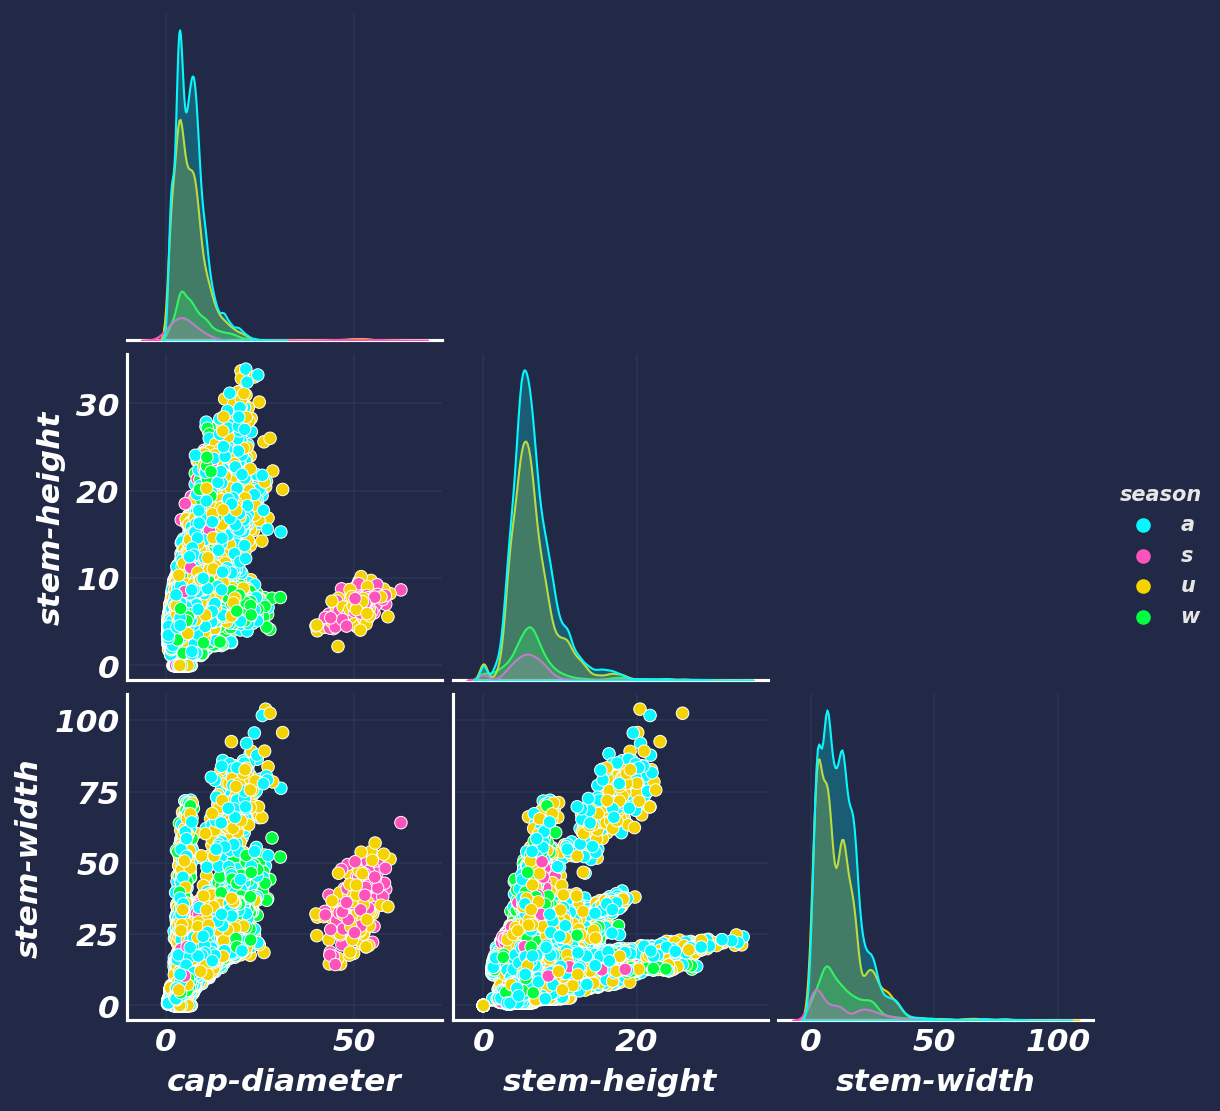

In [70]:
#check pakai correlation fitur numeric berdasarkan target 
sns.pairplot(train, hue="season", corner=True) 

In [ ]:
## final,make a new file

In [20]:
# check data 
print(train.shape) 
print(test.shape) 

print(train.isnull().any().sum()) 

print(train.duplicated().sum()) 

(42657, 17)
(18321, 17)
0
0


In [ ]:
train.to_csv("train_PredictingWeather(clean).csv", index=False) 
test.to_csv("test_PredictingWeather(clean).csv", index = False) 